<a href="https://colab.research.google.com/github/fallenangel2305/Stock-Prediction-Model-using-ML/blob/main/StockPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# This a program predicts the price of google stocks for a specific day

In [62]:
# Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [64]:
# Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab


Saving GOOG_Last_Month.csv to GOOG_Last_Month (1).csv


In [67]:
df = pd.read_csv('GOOG_Last_Month.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-17,1776.939941,1785.000000,1767.000000,1770.150024,1770.150024,1147100
1,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500
2,2020-11-19,1738.380005,1769.589966,1737.005005,1763.920044,1763.920044,1249900
3,2020-11-20,1765.209961,1774.000000,1741.859985,1742.189941,1742.189941,2313500
4,2020-11-23,1749.599976,1753.900024,1717.719971,1734.859985,1734.859985,2161600
5,2020-11-24,1730.500000,1771.599976,1727.689941,1768.880005,1768.880005,1578000
6,2020-11-25,1772.890015,1778.540039,1756.540039,1771.430054,1771.430054,1045800
7,2020-11-27,1773.089966,1804.000000,1772.439941,1793.189941,1793.189941,884900
8,2020-11-30,1781.183960,1788.064941,1755.000000,1760.739990,1760.739990,1823800
9,2020-12-01,1774.369995,1824.829956,1769.369995,1798.099976,1798.099976,1739000


In [68]:
# Print last row 
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-12-16,1772.880005,1773.0,1756.219971,1760.22998,1760.22998,890127


In [69]:
# Prepare data for training excluding last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-17,1776.939941,1785.000000,1767.000000,1770.150024,1770.150024,1147100
1,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500
2,2020-11-19,1738.380005,1769.589966,1737.005005,1763.920044,1763.920044,1249900
3,2020-11-20,1765.209961,1774.000000,1741.859985,1742.189941,1742.189941,2313500
4,2020-11-23,1749.599976,1753.900024,1717.719971,1734.859985,1734.859985,2161600
5,2020-11-24,1730.500000,1771.599976,1727.689941,1768.880005,1768.880005,1578000
6,2020-11-25,1772.890015,1778.540039,1756.540039,1771.430054,1771.430054,1045800
7,2020-11-27,1773.089966,1804.000000,1772.439941,1793.189941,1793.189941,884900
8,2020-11-30,1781.183960,1788.064941,1755.000000,1760.739990,1760.739990,1823800
9,2020-12-01,1774.369995,1824.829956,1769.369995,1798.099976,1798.099976,1739000


In [70]:
# Create an empty list to store independent and dependent data
days = list()
adj_close_prices = list()

In [71]:
# Get the date and adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']


In [78]:
#Create the independent data set
for day in df_days:
  days.append( [int(day.split('-')[2])] )
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [73]:
# Create the 3 Support Vector Regression Models
# Create and train SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

# Create the 3 Support Vector Regression Models
# Create and train SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

# Create the 3 Support Vector Regression Models
# Create and train SVR model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.1)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

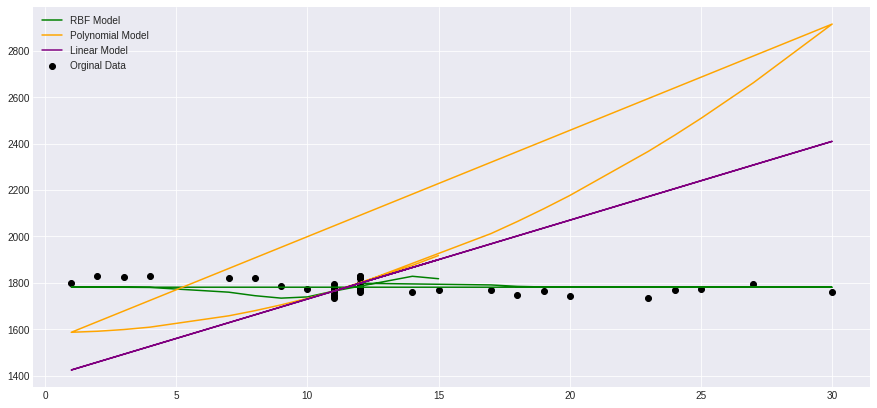

In [79]:
# Plot the models to a graph to see which has the best fit to the orginal data
plt.figure(figsize=(15,7))
plt.scatter(days, adj_close_prices, color='black', label='Orginal Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

In [80]:
# Show the predicted price for te given day
day = [[30]]

print("The RBF SVR predicted:", rbf_svr.predict(day))
print("The Polynomial SVR predicted:", poly_svr.predict(day))
print("The Linear SVR predicted:", lin_svr.predict(day))

The RBF SVR predicted: [1781.01001]
The Polynomial SVR predicted: [2914.90186331]
The Linear SVR predicted: [2409.638752]


In [81]:
#  Print actual price

print("The actual price is:", actual_price["Adj Close"][20])

The actual price is: 1760.22998
